In [1]:
import os
import pandas as pd;
import numpy as np
import time
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator as RGI, LinearNDInterpolator as linint
path = os.getcwd()+'/dIdt_q0.90inc0.dat'
colnames=["q",           "p",          "e",          "theta",          "E",          "Lz",          "C",          "Einf",          "LzInf",           "Cinf",          "Eh",          "Lzh",          "Ch",          "pinf",          "einf",          "thetainf",          "ph",          "eh",          "thetah",          "lmax",          "DeltaEinf",          "DeltaEh"]

In [2]:
DataSpinGetter = lambda spin: pd.read_csv(os.getcwd()+"/dIdt_q"+spin+"inc0.dat", header=None, delimiter=' ', names=colnames)
alldat = [DataSpinGetter(spin) for spin in ['0.10', '0.30', '0.50', '0.70', '0.90']]

In [3]:
unified = pd.concat(alldat)

In [5]:
coords = unified[{"q", "e", "p"}].values
dat = unified["Einf"].values

In [6]:
coords

array([[1.00000e-01, 5.00000e-03, 5.68000e+00],
       [1.00000e-01, 5.00000e-03, 5.70535e+00],
       [1.00000e-01, 5.00000e-03, 5.73082e+00],
       ...,
       [9.00000e-01, 9.25000e-01, 2.89800e+01],
       [9.00000e-01, 9.25000e-01, 2.94900e+01],
       [9.00000e-01, 9.25000e-01, 3.00000e+01]])

In [7]:
interpFUN = sp.interpolate.RBFInterpolator(coords, dat, neighbors=100, kernel="linear",smoothing=0, epsilon=6)
interp = lambda q,e,p: interpFUN([[q,e,p]])

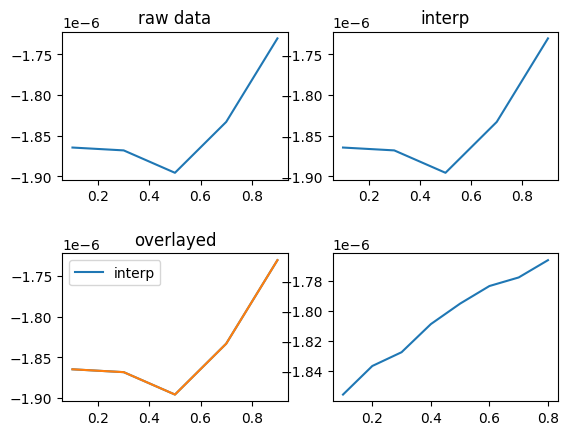

In [11]:
qvals = unified[(unified["e"]==0.005)&(unified["p"]>19.8)&(unified["p"]<20.1)]["q"].values
pvals = unified[(unified["e"]==0.005)&(unified["p"]>19.8)&(unified["p"]<20.1)]["p"].values
val2 =  unified[(unified["e"]==0.005)&(unified["p"]>19.8)&(unified["p"]<20.1)]["Einf"].values
dom = np.arange(0.1,0.91,0.2)
ran = np.zeros(len(dom))
for inx, i in enumerate(qvals):
    ran[inx] = interp(i,0.005,pvals[inx])
fig,ax = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.5)
ax[0,0].plot(qvals,val2)
ax[0,0].set_title("raw data")
ax[0,1].plot(dom,ran)
ax[0,1].set_title("interp")
ax[1,0].plot(dom,ran, label="interp")
ax[1,0].plot(qvals,val2)
ax[1,0].set_title("overlayed");
ax[1,0].legend()
dom1 = np.arange(0.1,0.9,0.1)
ran1 = [interp(i,0.005,20) for i in dom1]
ax[1,1].plot(dom1, ran1)

In [14]:
pvals

array([19.98464, 19.91749, 19.80077, 19.88004, 20.06111])

In [16]:
interp(0.3,0.005,20)

array([-1.82744793e-06])

In [96]:
tmp = list(map(list,coords))
len(tmp)

97006

In [98]:
len(np.unique(coords, axis=0))

97006